# Movie Coupon Recommendation Engine

## Student:Yu-Wen Chen

## 1. Objective of the Project

It can be said that watching movies is a favorite leisure entertainment of many people nowadays, and everyone has their own favorite movie category. From the most widely accepted action movies to the horror and romance movies that are loved by certain groups, each has its own fans. If the school is going to give movie coupons to students, I believe that the students also hope to receive their preferred type of movie. Therefore, I will make a movie coupon classification machine. There are three types of coupons, action movies, romance movies, and horror movies. The machine will give students suitable coupons based on their preference for these three types of movies.

In order to build this machine, I will select the column of action, romance, and horror movie from the data and use the same way as k means function to cluster the data into three groups. After the machine has built, the students only need to input their preference for these 3 kinds of movies by using a scale of 1 to 10 then the machine will give them the coupon that fits them.

## 2. Data Exploration

### (1) Showing the type of this data

##### Before we use the data we need to check the type of it first

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import statsmodels.api as sm
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#Imput the csv files
data=pd.read_csv("/Users/user/Desktop/School documents/Semester 1/ANLT/Class_2020_10_15__01_33_QZ_Movies, Movies & Movies.csv",encoding='unicode_escape')
#Use the dtype function to see the data types in each column
data.dtypes

ï»¿Student Name                                                                                 object
Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)            float64
Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)         float64
Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)            float64
Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)             float64
Using a scale 1 to 10, how much do you like drama movies?                                      float64
Using a scale 1 to 10, how much do you like fantasy movies?                                    float64
Using a scale 1 to 10, how much do you like science fiction movies?                            float64
Using a scale 1 to 10, how much do you like horror movies?                                     float64
Using a scale 1 to 10, how much do you like mystery movies?              

##### Most of the data types are float64 which is numerical values.

### (2) Showing the first 10 rows of the data

In [4]:
#Use the head function to see the first 10 rows of the data
data.head(10)

,ï»¿Student Name,"Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like thriller movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like animated movies?","On average, how many movies you watch on a single week",Which of the following movies you'd say is your preferred?,Describe yourself with 5 adjectives. For example:- Capable- Friendly- Happy- Sociable- Slow
0,"Chao, Christopher",7.0,8.30,6.2000,6.2000,4.200000,7.40000,8.900000,1.000000,7.500000,2.100000,7.90000,7.600000,9.500000,B. 2) One movie a week,B. Shrek,Happy
1,"Chen, Yu-Wen",9.0,7.80,9.8000,9.6300,6.300000,9.85000,7.500000,1.200000,7.845000,9.850000,6.38000,7.800000,8.650000,C. 3) Two movies a week,D. Spiderman,Friendly
2,"Chen, Ziheng",NaN,9.00,10.0000,7.0000,2.000000,6.00000,3.000000,9.000000,NaN,2.000000,9.00000,4.000000,7.000000,B. 2) One movie a week,A. Star Wars\nD. Spiderman,Friendly Happy
3,"Duan, Shangyan",10.0,8.80,NaN,5.1000,1.500000,4.80000,10.000000,2.000000,7.000000,4.680000,4.00000,10.000000,10.000000,C. 3) Two movies a week,G. Jurassic Park,Friendlyï¼Humorï¼Easygoingï¼Slowï¼Kind
4,"Ferrer, Darrel Steve",9.5,8.67,9.1234,7.8125,9.165423,9.51285,6.812572,5.196720,7.126234,8.912562,8.35137,7.135612,9.127836,E. 5) More than 4 movies a week,A. Star Wars,Friendly Helpful Kind Caring Altruistic
5,"Gong, Minghao",9.9,8.00,7.5000,9.9000,3.000000,4.00000,9.900000,2.000000,8.600000,1.400000,2.80000,7.000000,6.000000,B. 2) One movie a week,F. Hamilton,"Friendly, kind-heartedï¼ Sociableï¼"
6,"Guo, Jie",8.5,2.20,9.0000,3.0000,5.100000,7.77800,9.900000,5.123456,1.111000,5.000000,5.00000,1.000000,5.000000,B. 2) One movie a week,E. Mulan,"Happy, Friendly, Modestly, Active,Capable"
7,"Guo, Ziyu",10.0,10.00,8.0000,9.0000,3.000000,7.00000,10.000000,5.000000,7.000000,6.000000,5.00000,7.000000,9.000000,E. 5) More than 4 movies a week,A. Star Wars\nD. Spiderman,-Humor\n-Confident\n-Handsome\n-Sociable\n-Fri...
8,"Hernandez, Marisol",8.8,6.20,7.5000,2.4000,5.600000,1.10000,1.200000,2.200000,1.100000,5.300000,10.00000,7.300000,5.200000,C. 3) Two movies a week,G. Jurassic Park,"Active, Happy, Funny, Caring, Driven"
9,"Hsiao, Yu-Chen",8.5,9.60,4.7000,9.8000,8.900000,9.00000,9.100000,1.100000,9.200000,6.300000,9.40000,7.300000,8.400000,B. 2) One movie a week,G. Jurassic Park,Friendly\nTalk less\nWilling to help\nEasy goi...


##### It seems that the elements are between 1 to 10 and there are some NaN in the data

### (3) In order to show the number of rows and columns in the data

In [5]:
#Use the shape function to see the number of rows and columns in the data
print(data.shape)

(40, 17)


##### There are 40 rows and 17 columns in this data

### (4) Use describe function to see some information about these data

In [6]:
#Use the describe function to see the  mean, std, and IQR values for numeric columns
data.describe()

,"Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like thriller movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like animated movies?"
count,32.000000,32.000000,30.000000,32.000000,32.000000,33.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,32.000000
mean,8.271875,7.781777,7.898884,6.624312,5.326987,6.430874,7.959565,4.202194,6.309411,4.967958,5.960931,6.029592,6.615307
std,1.530599,1.981842,2.021029,2.821408,2.781892,2.778051,2.714946,3.244342,2.780907,2.902380,2.808752,2.871725,2.487203
min,4.500000,2.100000,2.500000,0.300000,0.000000,1.000000,1.200000,0.100000,1.000000,0.116541,1.000000,1.000000,1.000000
25%,7.000000,6.692500,7.200000,5.100000,3.000000,4.800000,6.609429,1.177775,5.127406,2.250000,3.925000,4.000000,5.000000
50%,8.400000,8.055556,8.250000,6.600000,5.750000,6.900000,9.300000,3.070796,6.969697,4.840000,6.700000,6.900000,6.716000
75%,9.900000,8.916000,9.292407,9.275000,7.500000,8.800000,9.900000,7.000000,8.300000,6.850000,8.413527,7.975000,8.725000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.990000,10.000000,10.000000,10.000000


##### It seems that most people prefer to watch the action, science fiction, adventure, and comedy movies and there is a high standard deviation in both romance and horror movies.

## 3. Dendrogram

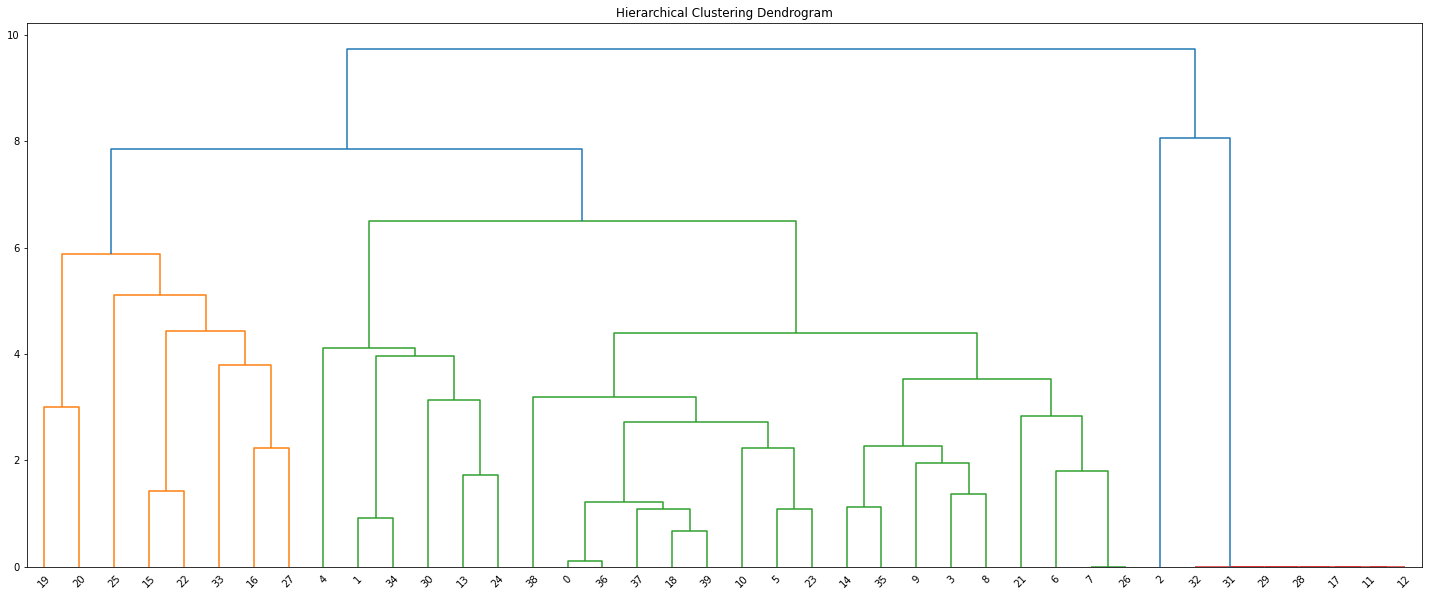

In [7]:
import matplotlib.pyplot as plt

#Rename all the columns
data.columns = ['student_name','action', 'adventure', 'comedy','crime','drama','fantasy','science_fiction',
        'horror','mystery','romance','thriller','documentary','animated','movie_watch_per_week','preferred','Describe_yourself']

#Select action, romance and science fiction columns
data1=data[["action",'romance','horror']]

#Change the rowname 
index=data1.index=data['student_name']

#Fill all the NaN data into 1
data1=data1.fillna(1)

#Use linkage to compute the distance between cluster
Z = linkage(data1,'average')

#Set the size of the plot
plt.figure(figsize=(25, 10))

#Set the title of the plot
plt.title('Hierarchical Clustering Dendrogram')

#Draw the dendrogram plot
dendrogram(Z, leaf_font_size =10)

#Print out the plot
plt.show()

##### According to the dendrogram above, we could see the result if we cluster the people into 3 groups by the action, romance, and horror movies.

## 4. Step-by-step K-means

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d
%matplotlib inline

#Defind the function into Kmeans
def Kmeans(data,k):
 global centroid
#Create 3 random points and named them as centroid 1, centroid, and centroid 3
 centroid1 = np.array([10,1,1])
 centroid2 = np.array([1,6,1])
 centroid3 = np.array([1,1,10])

##Select the columns of student_name, action , romance, and horror
 data2=data[["student_name","action",'romance','horror']]

#Fill those NA data into 1
 data2=data2.fillna(1)


#Calculate the distance of data and centroid 1 and add this column on data
 data2["Dist_C1"] = np.sqrt((data2.action - centroid1[0])**2 
                             + (data2.romance - centroid1[1])**2 
                           +(data2.horror - centroid1[2])**2 )

#Calculate the distance of data and centroid 2 and add this column on data
 data2["Dist_C2"] = np.sqrt((data2.action - centroid2[0])**2 + 
                             (data2.romance - centroid2[1])**2+(data2.horror - centroid2[2])**2)

#Calculate the distance of data and centroid 3 and add this column on data
 data2["Dist_C3"] = np.sqrt((data2.action - centroid3[0])**2 + 
                             (data2.romance - centroid3[1])**2+(data2.horror - centroid3[2])**2)

#Cluster the data by comparing the distance between 3 centroids and add this column on data
 data2["Association"] = np.where((data2.Dist_C1 < data2.Dist_C2) & (data2.Dist_C1 < data2.Dist_C3), 1, 
 np.where((data2.Dist_C2 < data2.Dist_C1) & 
              (data2.Dist_C2 < data2.Dist_C3) , 2, 3))

#Set the plot size
 fig = plt.figure(figsize=(20, 20))

#Add an Axes to the figure as part of a subplot arrangement
 ax = fig.add_subplot(1,1,1, projection='3d')

#Put those data point on the plot
 ax.scatter(data2['action'],data2['romance'],data2['horror'], s=80,depthshade = False)
 for x, y, z, l in zip(data2['action'],data2['romance'],data2['horror'],data2['student_name']):
    ax.text(x, y + 0.2, z, l)
    
#Change the label of x-axes    
 ax.set_xlabel('Action movie')

#Change the label of y-axes 
 ax.set_ylabel('Comedy movie')

#Change the label of z-axes 
 ax.set_zlabel('Horror movie')

#Put the dot of centroid1 on the plot and plant it with red
 ax.plot([centroid1[0],],[centroid1[1],],[centroid1[2],], c = 'r', marker = 'o',markersize=20)

#Put the dot of centroid 2 on the plot and color it green
 ax.plot([centroid2[0],],[centroid2[1],],[centroid2[2],], c = 'g', marker = 'o',markersize=20)

#Put the dot of centroid 3 on the plot and color it yellow
 ax.plot([centroid3[0],],[centroid3[1],],[centroid3[2],], c = 'y', marker = 'o',markersize=20)



###First iteration and associating points to centroids

#Find those data point which is in the first cluster and centroid the cluster by their mean
 centroid1 = data2[data2.Association == 1][["action", "romance",'horror']].mean()

#Find those data point which is in the second cluster and centroid the cluster by their mean
 centroid2 = data2[data2.Association == 2][["action", "romance",'horror']].mean()

#Find those data point which is in the third cluster and centroid the cluster by their mean
 centroid3 = data2[data2.Association == 3][["action", "romance",'horror']].mean()

#Calculate the distance of data and centroid 1 and add this column on data
 data2["Dist_C1"] = np.sqrt((data2.action - centroid1[0])**2 
                             + (data2.romance - centroid1[1])**2 
                           +(data2.horror - centroid1[2])**2 )

#Calculate the distance of data and centroid 2 and add this column on data
 data2["Dist_C2"] = np.sqrt((data2.action - centroid2[0])**2 + 
                             (data2.romance - centroid2[1])**2+(data2.horror - centroid2[2])**2)

#Calculate the distance of data and centroid 3 and add this column on data
 data2["Dist_C3"] = np.sqrt((data2.action - centroid3[0])**2 + 
                             (data2.romance - centroid3[1])**2+(data2.horror - centroid3[2])**2)

#Cluster the data by comparing the distance between 3 centroids and add this column on data
 data2["Association"] = np.where(
    (data2.Dist_C1 < data2.Dist_C2) & 
    (data2.Dist_C1 < data2.Dist_C3), 1, 
     np.where((data2.Dist_C2 < data2.Dist_C1) & 
    (data2.Dist_C2 < data2.Dist_C3) , 2, 3))




####Second iteration and associating points to centroids
#Find those data point which is in the first cluster and centroid the cluster by their mean
 centroid1 = data2[data2.Association == 1][["action", "romance",'horror']].mean()

#Find those data point which is in the second cluster and centroid the cluster by their mean
 centroid2 = data2[data2.Association == 2][["action", "romance",'horror']].mean()
 
 #Find those data point which is in the third cluster and centroid the cluster by their mean
 centroid3 = data2[data2.Association == 3][["action", "romance",'horror']].mean()

#Calculate the distance of data and centroid 1 and add this column on data
 data2["Dist_C1"] = np.sqrt((data2.action - centroid1[0])**2 
                             + (data2.romance - centroid1[1])**2 
                           +(data2.horror - centroid1[2])**2 )

#Calculate the distance of data and centroid 2 and add this column on data
 data2["Dist_C2"] = np.sqrt((data2.action - centroid2[0])**2 + 
                             (data2.romance - centroid2[1])**2+(data2.horror - centroid2[2])**2)

#Calculate the distance of data and centroid 3 and add this column on data
 data2["Dist_C3"] = np.sqrt((data2.action - centroid3[0])**2 + 
                             (data2.romance - centroid3[1])**2+(data2.horror - centroid3[2])**2)

#Cluster the data by comparing the distance between 3 centroids and add this column on data
 data2["Association"] = np.where(
    (data2.Dist_C1 < data2.Dist_C2) & 
    (data2.Dist_C1 < data2.Dist_C3), 1, 
     np.where((data2.Dist_C2 < data2.Dist_C1) & 
    (data2.Dist_C2 < data2.Dist_C3) , 2, 3))
    
    

####Third iteration and associating points to centroids
#Find those data point which is in the first cluster and centroid the cluster by their mean
 centroid1 = data2[data2.Association == 1][["action", "romance",'horror']].mean()

#Find those data point which is in the second cluster and centroid the cluster by their mean
 centroid2 = data2[data2.Association == 2][["action", "romance",'horror']].mean()

#Find those data point which is in the third cluster and centroid the cluster by their mean
 centroid3 = data2[data2.Association == 3][["action", "romance",'horror']].mean()

#Calculate the distance of data and centroid 1 and add this column on data
 data2["Dist_C1"] = np.sqrt((data2.action - centroid1[0])**2 
                             + (data2.romance - centroid1[1])**2 
                           +(data2.horror - centroid1[2])**2 )

#Calculate the distance of data and centroid 2 and add this column on data
 data2["Dist_C2"] = np.sqrt((data2.action - centroid2[0])**2 + 
                             (data2.romance - centroid2[1])**2+(data2.horror - centroid2[2])**2)

#Calculate the distance of data and centroid 3 and add this column on data
 data2["Dist_C3"] = np.sqrt((data2.action - centroid3[0])**2 + 
                             (data2.romance - centroid3[1])**2+(data2.horror - centroid3[2])**2)

#Cluster the data by comparing the distance between 3 centroids and add this column on data
 data2["Association"] = np.where(
    (data2.Dist_C1 < data2.Dist_C2) & 
    (data2.Dist_C1 < data2.Dist_C3), 1, 
     np.where((data2.Dist_C2 < data2.Dist_C1) & 
    (data2.Dist_C2 < data2.Dist_C3) , 2, 3))
    
    
    
    
    
####Forth iteration and associating points to centroids

#Find those data point which is in the first cluster and centroid the cluster by their mean
 centroid1 = data2[data2.Association == 1][["action", "romance",'horror']].mean()

#Find those data point which is in the second cluster and centroid the cluster by their mean
 centroid2 = data2[data2.Association == 2][["action", "romance",'horror']].mean()

#Find those data point which is in the third cluster and centroid the cluster by their mean
 centroid3 = data2[data2.Association == 3][["action", "romance",'horror']].mean()

#Calculate the distance of data and centroid 1 and add this column on data
 data2["Dist_C1"] = np.sqrt((data2.action - centroid1[0])**2 
                             + (data2.romance - centroid1[1])**2 
                           +(data2.horror - centroid1[2])**2 )

#Calculate the distance of data and centroid 2 and add this column on data
 data2["Dist_C2"] = np.sqrt((data2.action - centroid2[0])**2 + 
                             (data2.romance - centroid2[1])**2+(data2.horror - centroid2[2])**2)

#Calculate the distance of data and centroid 3 and add this column on data
 data2["Dist_C3"] = np.sqrt((data2.action - centroid3[0])**2 + 
                             (data2.romance - centroid3[1])**2+(data2.horror - centroid3[2])**2)

#Cluster the data by comparing the distance between 3 centroids and add this column on data
 data2["Association"] = np.where(
    (data2.Dist_C1 < data2.Dist_C2) & 
    (data2.Dist_C1 < data2.Dist_C3), 1, 
     np.where((data2.Dist_C2 < data2.Dist_C1) & 
    (data2.Dist_C2 < data2.Dist_C3) , 2, 3))
    
#Transfer centroid 1,2,3 into dataframe
 centroid1=pd.DataFrame(centroid1) 
 centroid2=pd.DataFrame(centroid2)
 centroid3=pd.DataFrame(centroid3)
#Combine all the centroid
 centroid=pd.concat([centroid1, centroid2,centroid3], axis=1)
 
####Result of Forth Iteration
#Set the plot size
 fig = plt.figure(figsize=(20, 20))

#Add an Axes to the figure as part of a subplot arrangement
 ax = fig.add_subplot(1,1,1, projection='3d')

# Create a colormap
 colormap = np.array(['black', 'red', 'green', 'yellow'])

#Put those data point on the plot and color it by their association
 ax.scatter(data2['action'],data2['romance'],data2['horror'], s=80,depthshade = False,c = colormap[data2.Association])
 for x, y, z, l in zip(data2['action'],data2['romance'],data2['horror'],data2['student_name']):
    ax.text(x , y + 0.2, z, l)
    
#Change the label of x-axes      
 ax.set_xlabel('Action movie')

#Change the label of y-axes  
 ax.set_ylabel('Romance movie')

#Change the label of z-axes  
 ax.set_zlabel('Horror movie')

#Put the dot of centroid1 on the plot and plant it with red
 ax.plot([centroid.iloc[0,0],],[centroid.iloc[1,0],],[centroid.iloc[2,0],], c = 'r', marker = 'o',markersize=20)
#Put the dot of centroid2 on the plot and plant it with green
 ax.plot([centroid.iloc[0,1],],[centroid.iloc[1,1],],[centroid.iloc[2,1],], c = 'g', marker = 'o',markersize=20)
#Put the dot of centroid3 on the plot and plant it with yellow
 ax.plot([centroid.iloc[0,2],],[centroid.iloc[1,2],],[centroid.iloc[2,2],], c = 'y', marker = 'o',markersize=20)

 

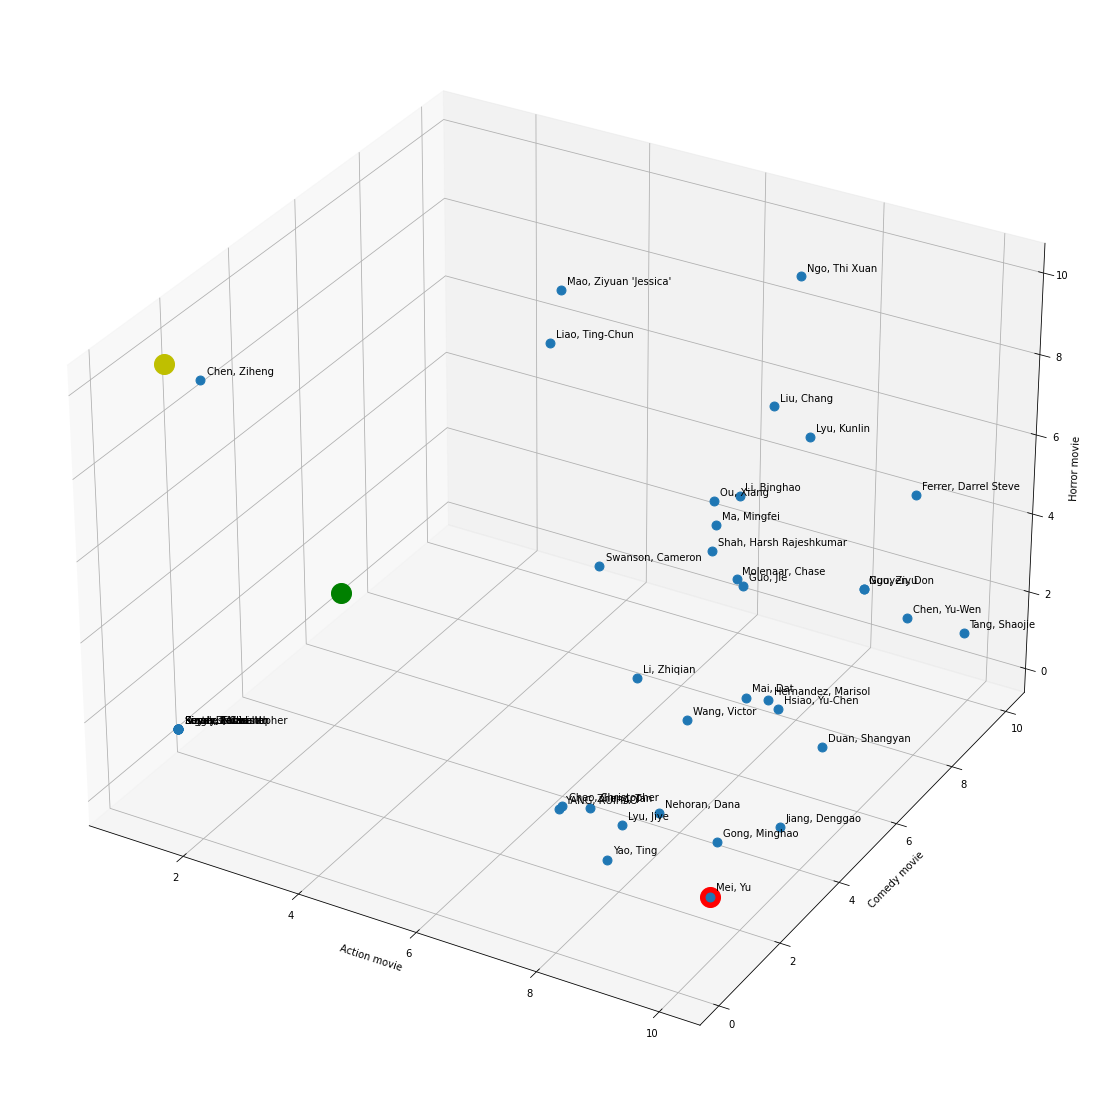

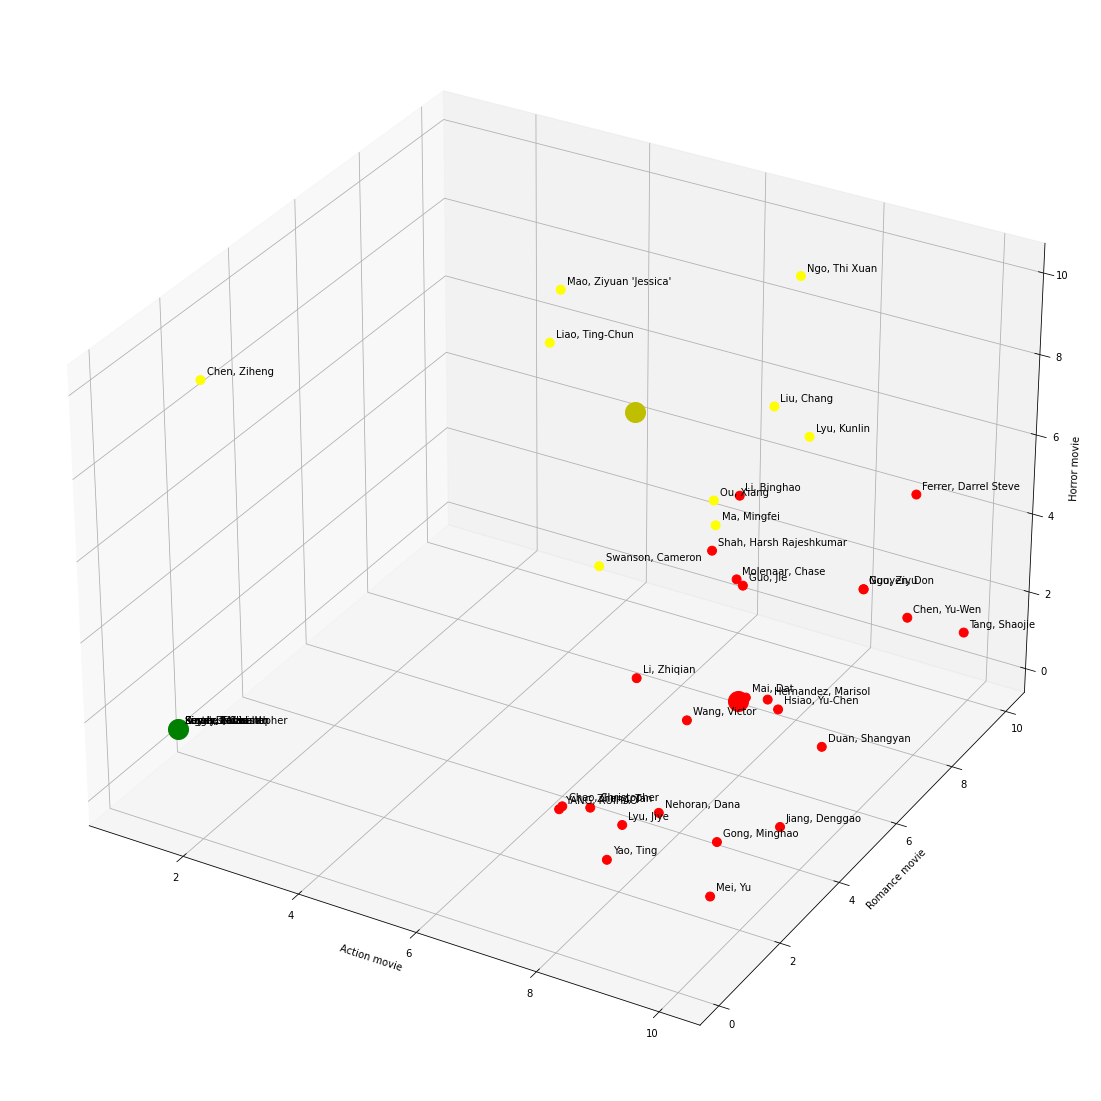

In [7]:
#Test the function
Kmeans(data=data,k=3)

##### First plot:This is how the data looks like on the scatter plot and the points with different colors are the random centroids we are going to use

##### Second plot:The plot above is the result after we cluster the data into 3 group

## 5. Sklearn.cluster

##### Use the KMeans function to cluster the data again

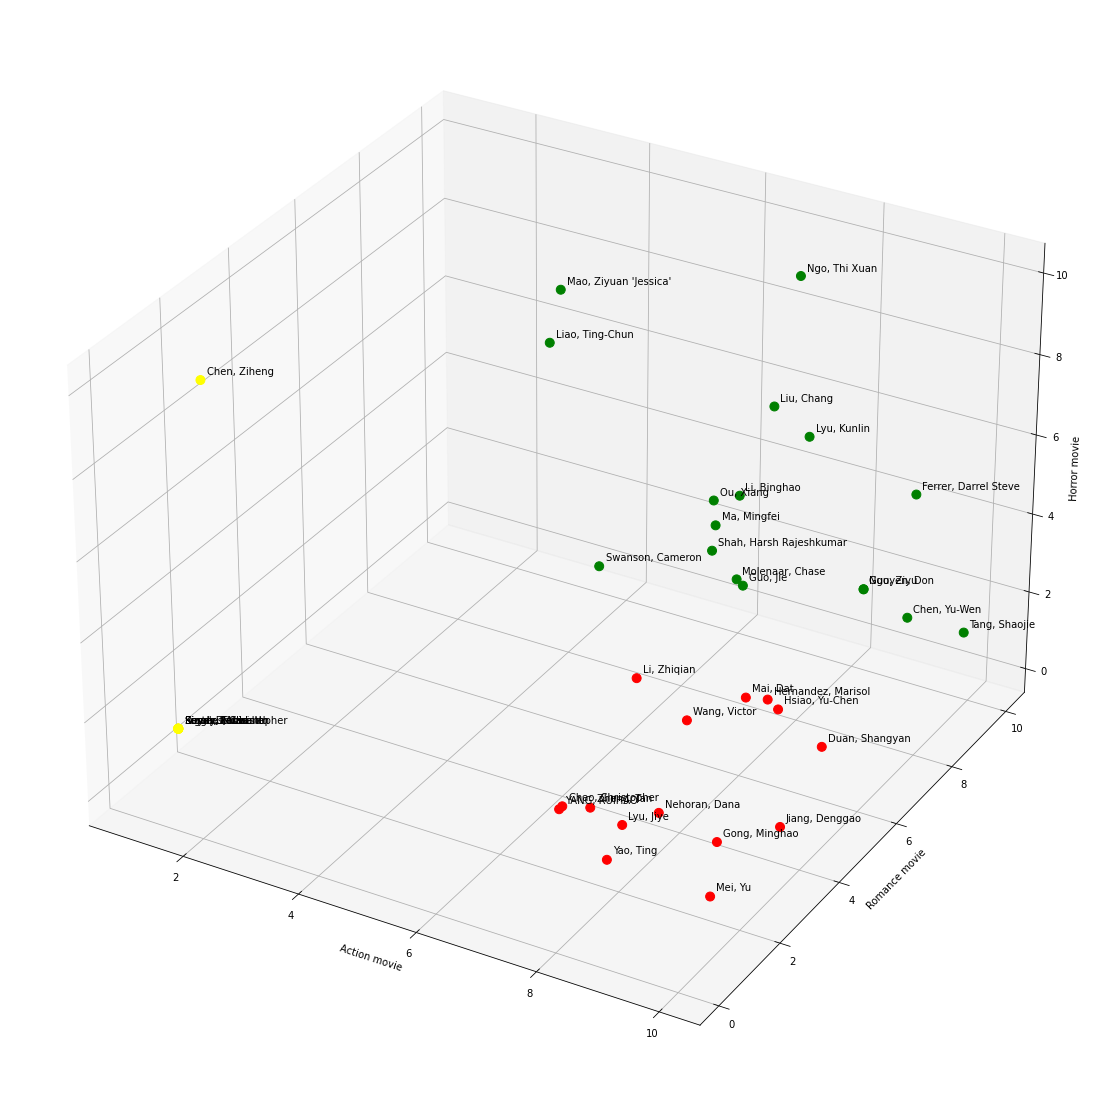

In [13]:
from sklearn.cluster import KMeans

#Use KMeans function cluster the data into 3 groups
model = KMeans(n_clusters = 3)

#Input the data we want to cluster
model.fit(data1)

#Set the plot size
fig = plt.figure(figsize=(20, 20))

#Add an Axes to the figure as part of a subplot arrangement
ax = fig.add_subplot(1,1,1, projection='3d')

# Create a colormap
colormap = np.array(['red', 'green', 'yellow'])

#Put those data point on the plot and color it by their association
ax.scatter(data1['action'],data1['romance'],data1['horror'], s=80,depthshade = False,c = colormap[model.labels_])
for x, y, z, l in zip(data1['action'],data1['romance'],data1['horror'],data['student_name']):
        ax.text(x, y +0.2, z, l)
        
#Change the label of x-axes       
ax.set_xlabel('Action movie')

#Change the label of y-axes   
ax.set_ylabel('Romance movie')

#Change the label of z-axes   
ax.set_zlabel('Horror movie')

#Print out the plot
plt.show() 

##### According to the result above we could clearly see the function cluster the data into three groups and the plot is the same as the result we did in the last part. Those people who give a higher point to horror movies will be in that group. And for those people who give both higher points to action and romance movies but give lower point to horror movies will go to the action movie group. Finally, the rest of the people will go to the romance movie group.

## 6. Prediction

##### Use the result we have done to create a function 

In [ ]:
#Use def function to define the function we create
def function(a,b,c):
    
    #Create a window so they could input their scale of Action movie
    a=float(input('Using a scale 1 to 10, how much do you like Action movies?\n'))
    
    #Create a window so they could input their scale of Romance movie
    b=float(input('Using a scale 1 to 10, how much do you like Romance movies?\n'))
    
     #Create a window so they could input their scale of Horror movie
    c=float(input("Using a scale 1 to 10, how much do you like Horror movies?\n"))
    
    #Calculate the distance of data and centroid 1 and named it as dis1  
    dis1= np.sqrt((a-centroid.iloc[0,0])**2 +(b-centroid.iloc[1,0])**2 +(c-centroid.iloc[2,0])**2)
    
    #Calculate the distance of data and centroid 2 and named it as dis2  
    dis2 = np.sqrt((a - centroid.iloc[0,1])**2 + (b - centroid.iloc[1,1])**2+(c - centroid.iloc[2,1])**2)
    
    #Calculate the distance of data and centroid 3 and named it as dis3  
    dis3 = np.sqrt((a - centroid.iloc[0,2])**2 + (b - centroid.iloc[1,2])**2+(c - centroid.iloc[2,2])**2)
    
    #Compare each distance to distinguish which movie genre he prefers
    if (dis1< dis2) & (dis1 < dis3):
        print('Action Movie Coupon')
    elif(dis2 < dis1) & (dis2 < dis3):
        print('Romance Movie Coupon')
    elif(dis3 < dis1) & (dis3 < dis2):
        print('Horror Movie Coupon')

### Try this function on 10 different parameters

#### (1) Action movie: 10 Romance movie: 1  Horror movie: 2

In [ ]:
#Put the parameters into function 
function(10,1,2)

##### The student would get Action Movie Coupon

#### (2) Action movie: 9 Romance movie: 10  Horror movie: 8

In [ ]:
#Put the parameters into function 
function(9,10,8)

##### The student would get Horror Movie Coupon

#### (3) Action movie: 5 Romance movie: 7  Horror movie: 4

In [ ]:
#Put the parameters into function 
function(5,7,4)

##### The student would get Action Movie Coupon

#### (4) Action movie: 6 Romance movie: 5  Horror movie: 4

In [ ]:
#Put the parameters into function 
function(6,5,4)

##### The student would get Action Movie Coupon

#### (5) Action movie: 2 Romance movie: 1  Horror movie: 1

In [ ]:
#Put the parameters into function 
function(2,1,1)

##### The student would get Romance Movie Coupon

#### (6) Action movie: 3 Romance movie: 4  Horror movie: 8

In [ ]:
#Put the parameters into function 
function(3,4,8)

##### The student would get Horror Movie Coupon

#### (7) Action movie:10 Romance movie: 7  Horror movie: 6

In [ ]:
#Put the parameters into function 
function(10,7,6)

##### The student would get Action Movie Coupon

#### (8) Action movie: 7 Romance movie: 7  Horror movie: 3

In [ ]:
#Put the parameters into function 
function(7,7,3)

##### The student would get Action Movie Coupon

#### (9) Action movie: 3 Romance movie: 7  Horror movie: 8

In [ ]:
#Put the parameters into function 
function(3,7,8)

##### The student would get Horror Movie Coupon

#### (10) Action movie: 6 Romance movie: 7  Horror movie: 5

In [ ]:
#Put the parameters into function 
function(6,7,5)

##### The student would get Action Movie Coupon

## 7. Summary

In order to build this movie coupon recommendation engine, I select the column of action, romance, and horror movie from the data then put three random dots on the data. Using these three random dots to find the centroid of each cluster. I center the centroids and associate points four times until the centroids are stabilized. Then I define it as a function so the student would be easy to input their preference into the machine. The students only need to input their preference for action, romance, and horror movies by using a scale of 1 to 10 then they will get the coupon it recommends.

In [9]:
data1

,action,romance,horror
student_name,,,
"Chao, Christopher",7.0,2.100000,1.000000
"Chen, Yu-Wen",9.0,9.850000,1.200000
"Chen, Ziheng",1.0,2.000000,9.000000
"Duan, Shangyan",10.0,4.680000,2.000000
"Ferrer, Darrel Steve",9.5,8.912562,5.196720
"Gong, Minghao",9.9,1.400000,2.000000
"Guo, Jie",8.5,5.000000,5.123456
"Guo, Ziyu",10.0,6.000000,5.000000
"Hernandez, Marisol",8.8,5.300000,2.200000


In [10]:
data

,student_name,action,adventure,comedy,crime,drama,fantasy,science_fiction,horror,mystery,romance,thriller,documentary,animated,movie_watch_per_week,preferred,Describe_yourself
0,"Chao, Christopher",7.0,8.300000,6.200000,6.200000,4.200000,7.400000,8.900000,1.000000,7.500000,2.100000,7.900000,7.600000,9.500000,B. 2) One movie a week,B. Shrek,Happy
1,"Chen, Yu-Wen",9.0,7.800000,9.800000,9.630000,6.300000,9.850000,7.500000,1.200000,7.845000,9.850000,6.380000,7.800000,8.650000,C. 3) Two movies a week,D. Spiderman,Friendly
2,"Chen, Ziheng",NaN,9.000000,10.000000,7.000000,2.000000,6.000000,3.000000,9.000000,NaN,2.000000,9.000000,4.000000,7.000000,B. 2) One movie a week,A. Star Wars\nD. Spiderman,Friendly Happy
3,"Duan, Shangyan",10.0,8.800000,NaN,5.100000,1.500000,4.800000,10.000000,2.000000,7.000000,4.680000,4.000000,10.000000,10.000000,C. 3) Two movies a week,G. Jurassic Park,Friendlyï¼Humorï¼Easygoingï¼Slowï¼Kind
4,"Ferrer, Darrel Steve",9.5,8.670000,9.123400,7.812500,9.165423,9.512850,6.812572,5.196720,7.126234,8.912562,8.351370,7.135612,9.127836,E. 5) More than 4 movies a week,A. Star Wars,Friendly Helpful Kind Caring Altruistic
5,"Gong, Minghao",9.9,8.000000,7.500000,9.900000,3.000000,4.000000,9.900000,2.000000,8.600000,1.400000,2.800000,7.000000,6.000000,B. 2) One movie a week,F. Hamilton,"Friendly, kind-heartedï¼ Sociableï¼"
6,"Guo, Jie",8.5,2.200000,9.000000,3.000000,5.100000,7.778000,9.900000,5.123456,1.111000,5.000000,5.000000,1.000000,5.000000,B. 2) One movie a week,E. Mulan,"Happy, Friendly, Modestly, Active,Capable"
7,"Guo, Ziyu",10.0,10.000000,8.000000,9.000000,3.000000,7.000000,10.000000,5.000000,7.000000,6.000000,5.000000,7.000000,9.000000,E. 5) More than 4 movies a week,A. Star Wars\nD. Spiderman,-Humor\n-Confident\n-Handsome\n-Sociable\n-Fri...
8,"Hernandez, Marisol",8.8,6.200000,7.500000,2.400000,5.600000,1.100000,1.200000,2.200000,1.100000,5.300000,10.000000,7.300000,5.200000,C. 3) Two movies a week,G. Jurassic Park,"Active, Happy, Funny, Caring, Driven"
9,"Hsiao, Yu-Chen",8.5,9.600000,4.700000,9.800000,8.900000,9.000000,9.100000,1.100000,9.200000,6.300000,9.400000,7.300000,8.400000,B. 2) One movie a week,G. Jurassic Park,Friendly\nTalk less\nWilling to help\nEasy goi...
